In [2]:
import tensorflow as tf

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Recommendation System ( Type 1 )

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('EcommerceRatingData.csv')

In [9]:
df.head(5)

,UserId\tProductId\tRating\tTimestamp
0,A39HTATAQ9V7YF\t205616461\t5\t1369699200
1,A3JM6GV9MNOF9X\t558925278\t3\t1355443200
2,A1Z513UWSAAO0F\t558925278\t5\t1404691200
3,A1WMRR494NWEWV\t733001998\t4\t1382572800
4,A3IAAVS479H7M7\t737104473\t1\t1274227200


In [10]:
df = pd.read_csv('EcommerceRatingData.csv', sep='\t')

In [11]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [13]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)



In [15]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=6f38151bc1ac2e78d7c6df5a6aa961b3e8b82aa8f3d01a452d4ce4bd669d6461
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [18]:
amazon_ratings = pd.read_csv('EcommerceRatingData.csv', sep='\t')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [19]:
amazon_ratings.shape

(1048575, 4)

In [20]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918
B00121UVU0,1838
B000FS05VG,1589
B000142FVW,1558
B001JKTTVQ,1468


<AxesSubplot:xlabel='ProductId'>

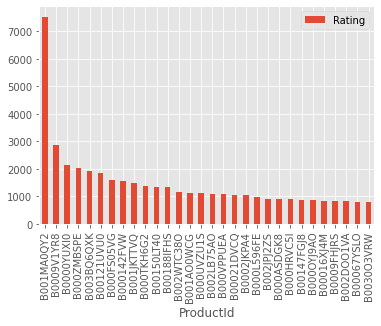

In [21]:
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YRB has sales of 3000, etc.


# Recommendation System ( Type 2 )

In [22]:
# Model-based collaborative filtering system
# Utility Matrix based on products sold and user reviews
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [24]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
ratings_utility_matrix.shape

(9697, 886)

In [26]:
# Transposing the matrix

X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X.shape

(886, 9697)

In [28]:
# Unique products in subset of data

X1 = X

In [29]:
# Decomposing the Matrix

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [30]:
# Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [32]:
# Isolating Product ID # 6162071103 from the Correlation Matrix
# Assuming the customer buys Product ID # 6162071103 (randomly chosen)


X.index[99]

'6162071103'

In [35]:
# Index # of product ID purchased by customer

i = "6162071103"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [36]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [37]:
# Recommending top 10 highly correlated products in sequence

Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['1304482634',
 '1929099886',
 '3292000971',
 '4057362967',
 '4057553908',
 '5357955867',
 '5357956227',
 '558925278',
 '6022600685']

### Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website